In [1]:
import pandas as pd
import sqlite3
import numpy as np
import parse_dados_banco as pd2

In [2]:
import estrategias as es

In [3]:
import matplotlib.pyplot as plt
import mplfinance as mpf

In [4]:
con = sqlite3.connect("dados_varias_coin.db")
ls_bot = pd.read_sql_query(f'SELECT * from bot;', con)
ls_bot.head()

,id,coin,qnt_brl_inicial,qnt_coin,qnt_brl_atual,grid_valor,limite_inferior,limite_superior,qnt_trade
0,1,XRP,20.0,5.478550,7.617341,0.06,1.90,3.1,0.50
1,2,XRP,20.0,2.988300,13.782748,0.04,2.25,2.7,0.50
2,3,USDC,50.0,0.992200,44.642416,0.04,5.00,5.7,1.03
3,4,USDC,50.0,3.077949,33.084539,0.04,5.00,5.8,1.03
4,5,XRP,20.0,0.000000,20.000000,0.04,3.10,4.2,1.00


In [5]:
r_existe_dados, bd_candle = pd2.pega_dados_since_db(30000, "XRP")


In [6]:
valores_para_ser_acionado = list(np.arange(1.9, 3.1, 0.06))


In [7]:
ls_valeos = list(filter(lambda x: x> 1.9 and x< 3.1, valores_para_ser_acionado))

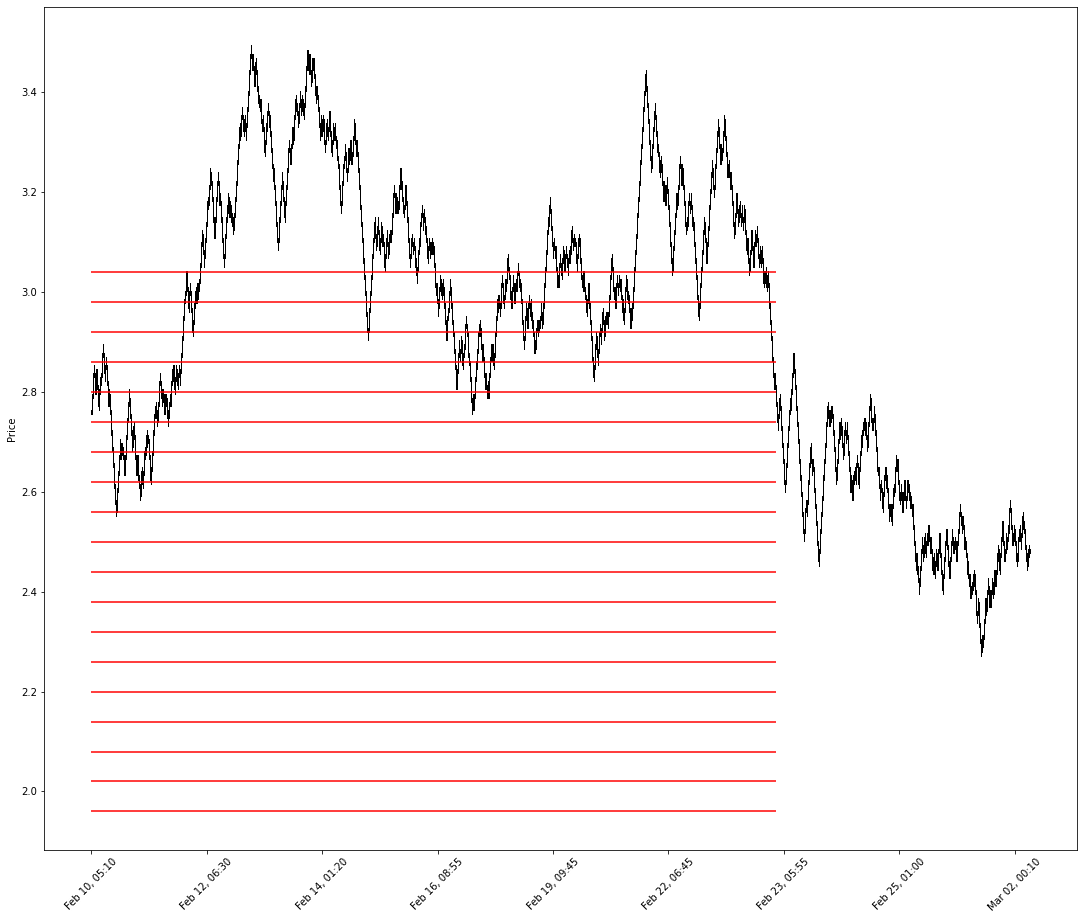

In [8]:
fig, ax = plt.subplots(1,1)


fig.set_size_inches(18.5, 15.5)

# ax.scatter(bd_candle.index[:], bd_candle["close"])
mpf.plot(bd_candle,type='renko',ax=ax)


# ax.ylim([1, 4])
for linha in ls_valeos:
#     print(linha)
    ax.hlines(linha, xmin=0, xmax=len(bd_candle)/2, color='r', linestyle='-')
    
# ax.show()

In [9]:
# valores_para_ser_acionado[5] % 0.06 == 0

In [10]:
valores_para_ser_acionado = list(np.arange(1, 5, 0.06))
def grafico_valores_acionados(bd_candle, valores_para_ser_acionado):
    fig, ax = plt.subplots(1,1)
    fig.set_size_inches(18.5, 15.5)
    # ax.scatter(bd_candle.index[:], bd_candle["close"])
    mpf.plot(bd_candle,type='renko',ax=ax)
    ls_valeos = list(filter(lambda x: x> 1.9 and x<3.1, valores_para_ser_acionado))

    # ax.ylim([1, 4])
    for linha in ls_valeos:
    #     print(linha)
        ax.hlines(linha, xmin=0, xmax=len(bd_candle)/2, color='r', linestyle='-')

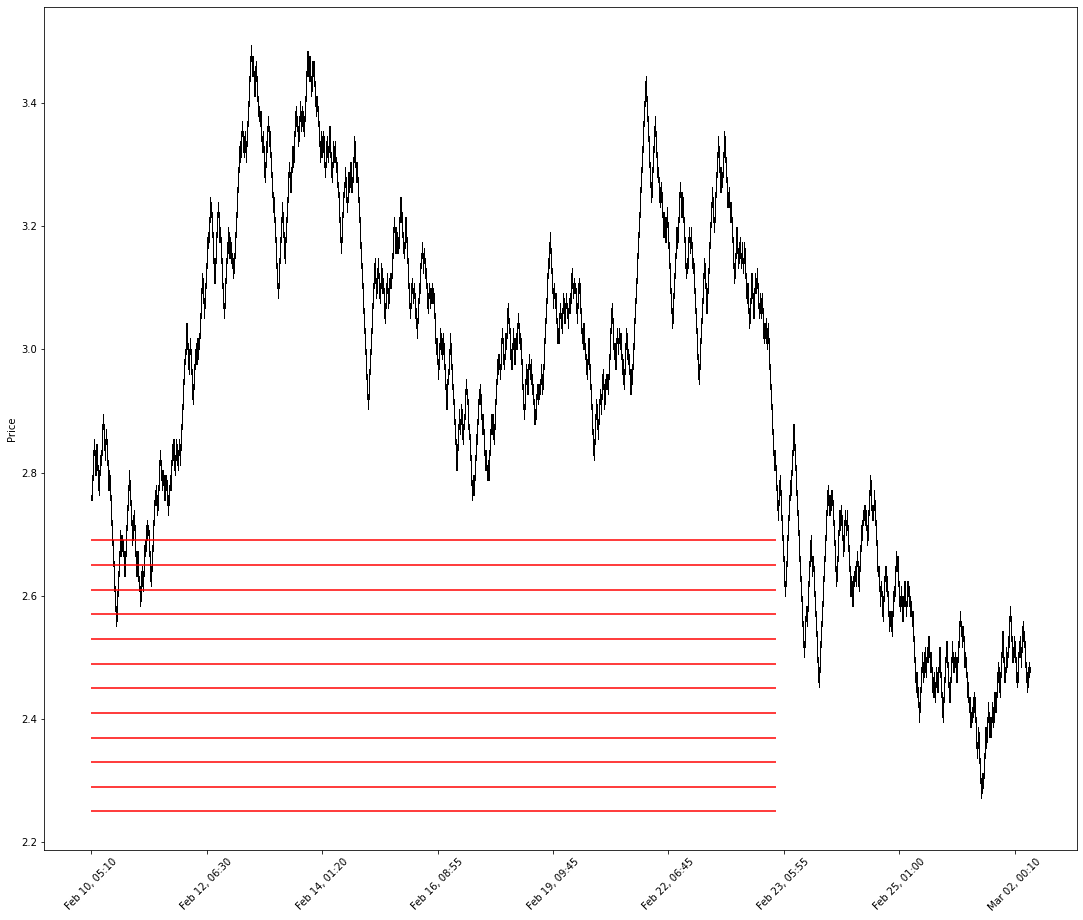

In [11]:
grafico_valores_acionados(bd_candle, np.arange(2.25, 2.7, 0.04))

In [12]:
(5.7 - 5)/0.04 *5

87.50000000000001

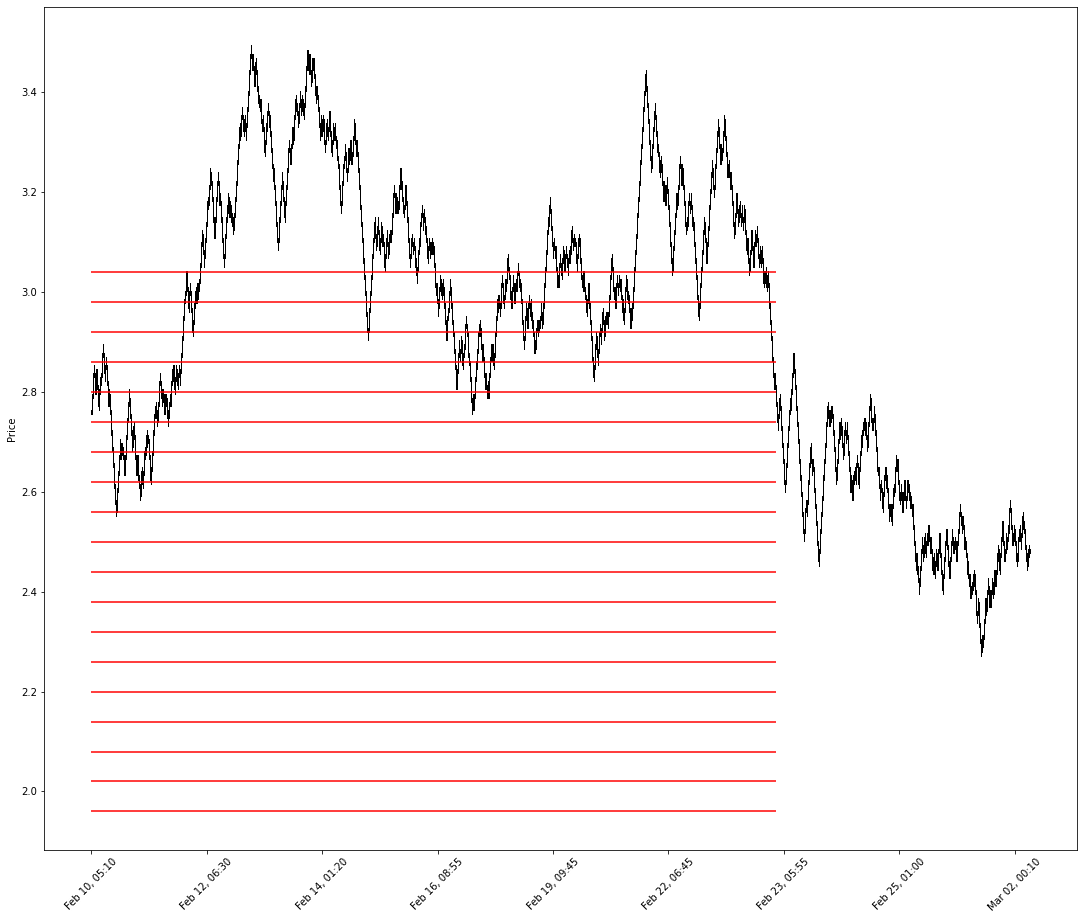

In [13]:
grafico_valores_acionados(bd_candle, np.arange(1.9, 3.1, 0.06))

In [14]:
def range_do_valor(valor, limite_inferior, limite_superior, variacao):
    range_bot = get_range(limite_inferior,limite_superior,variacao)
    for rang_sup, range_inf in range_bot:
        r_e_o_range = valor>range_inf and valor< rang_sup
        if r_e_o_range:
            rs_i = range_inf
            rs_s = rang_sup
            break
    return round(range_inf,8)
            
    

In [15]:
def get_range( limite_inferior, limite_superior, variacao):
    range_superior = np.arange(limite_inferior, limite_superior, variacao)
    range_inferior = np.arange(limite_inferior-variacao, limite_superior-variacao,variacao)
    range_bot = zip(range_superior,range_inferior)
    return range_bot

In [16]:
# def back_teste(df_valore):
def get_range( limite_inferior, limite_superior, variacao):
    range_superior = np.arange(limite_inferior, limite_superior, variacao)
    range_inferior = np.arange(limite_inferior-variacao, limite_superior-variacao,variacao)
    range_bot = zip(range_superior,range_inferior)
    return range_bot

def range_do_valor(valor, limite_inferior, limite_superior, variacao):
    range_bot = get_range(limite_inferior,limite_superior,variacao)
    for rang_sup, range_inf in range_bot:
        r_e_o_range = valor>range_inf and valor< rang_sup
        if r_e_o_range:
            rs_i = range_inf
            rs_s = rang_sup
            break
    return round(range_inf,8), round(rang_sup,8)
    

In [17]:
print(range_do_valor(2.54, 1, 4,0.05))

(2.5, 2.55)


In [18]:
operacao = (0.04 *2.54 )
operacao - operacao* 0.5*2/100


0.100584

In [19]:
operacao

0.10160000000000001

In [20]:
min(bd_candle.index)

Timestamp('2021-02-10 05:10:56')

In [21]:
max(bd_candle.index)

Timestamp('2021-03-03 01:05:56')

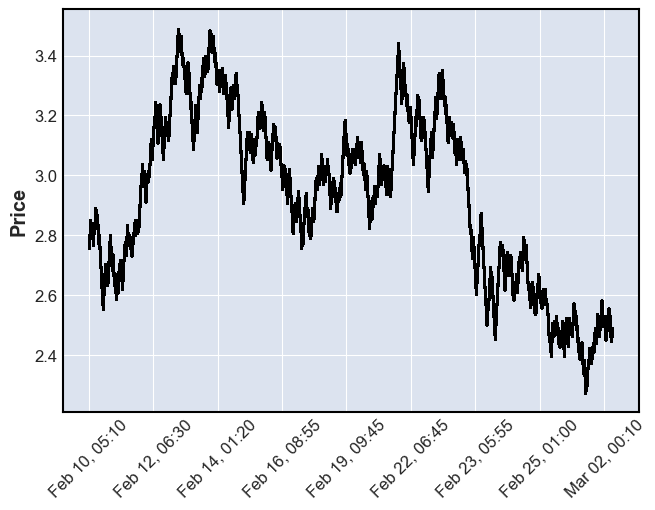

In [22]:
# bd_candle.head()
mpf.plot(bd_candle,type='renko')